In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\German Banking\german_credit_data.csv")

#visual of the first 5 rows
print(data.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [5]:
# the first column contains only the index -> safe to delete
data.drop(data.columns[0], inplace=True, axis=1)

#check for missing value and data types
print("Database has {} obserwations (customers) and {} columns (attributes).".format(data.shape[0],data.shape[1]))
print("Missing values in each column:\n{}".format(data.isnull().sum()))
print("Columns data types:\n{}".format(data.dtypes))

Database has 1000 obserwations (customers) and 9 columns (attributes).
Missing values in each column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Columns data types:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [ ]:
#there are 3 numeric variables and 5 categorical variables

In [4]:
#check for unique values
n_unique = data.nunique()
print("Number of unique values:\n{}".format(n_unique))
#check for unique values in categorical variables
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64
Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [ ]:
## Exploratory Data Analysis (EDA)

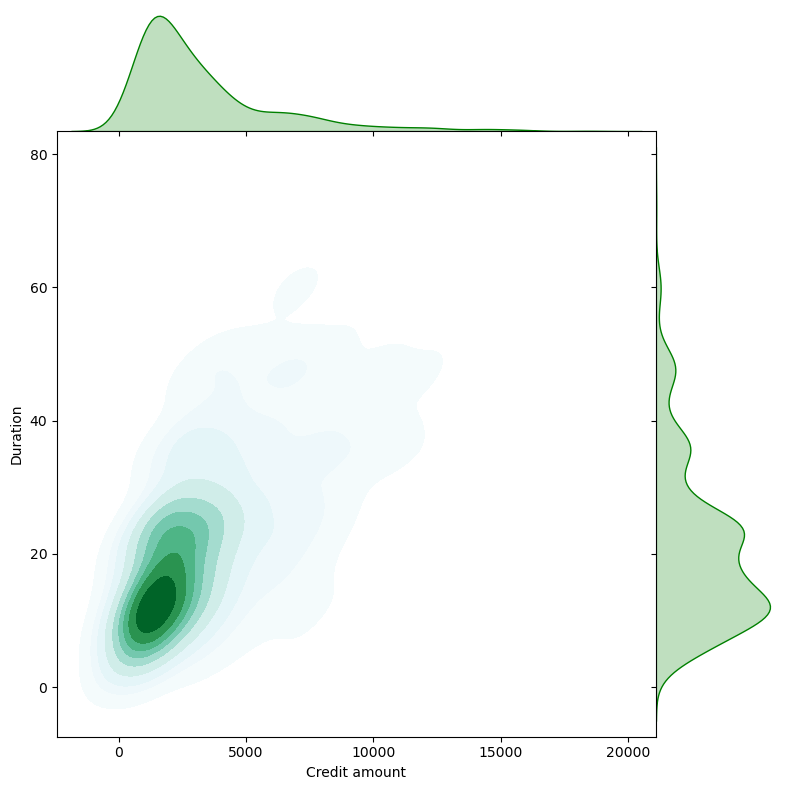

In [68]:
# Area with biggest amount of credit

sns.jointplot(x="Credit amount", y="Duration", data=data, kind="kde", space=0, color="g", height=8, fill=True, cmap="BuGn", thresh=0.05)
plt.show()

In [ ]:
# most credit are for low amount and short duration -> this is where most of the business of the bank

Text(0.5, 0, 'Age')

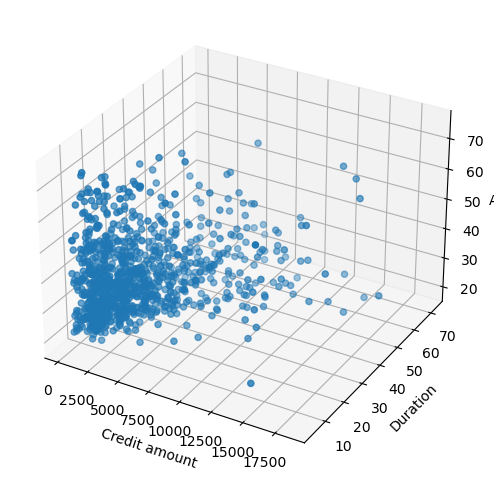

In [87]:
# 3D graph to show age, credit amount, duration
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [ ]:
# most of busines are from low credit amount, short duration and young people

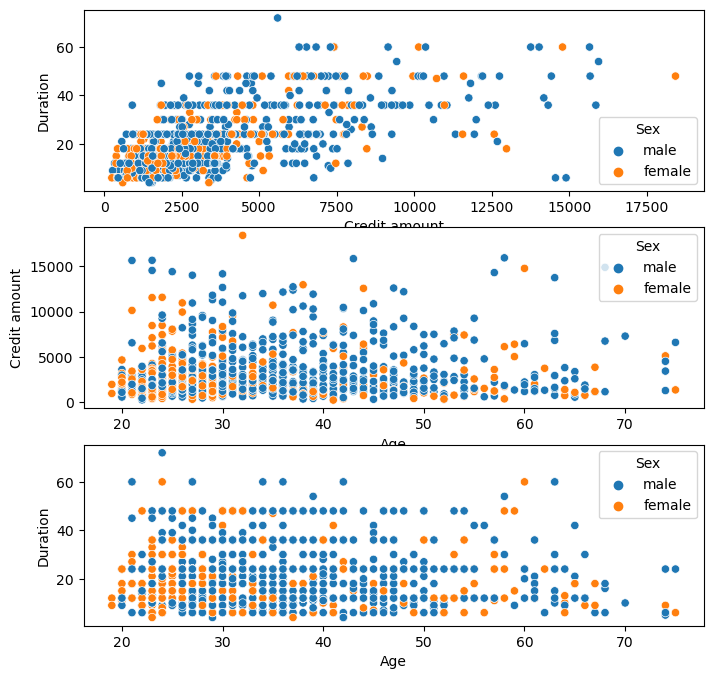

In [103]:
# function to generate plots for 3 numeric variables
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x='Credit amount', y='Duration', hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x='Age', y='Credit amount', hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x='Age', y='Duration', hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout

scatters(data, h='Sex')

In [ ]:
# Age: female customers are tend to be younger.
# Credit amount & Duration: tend to have correlation

Correlation Efficiency = 0.6249841983009838
P Value = 1.8628512880457362e-109


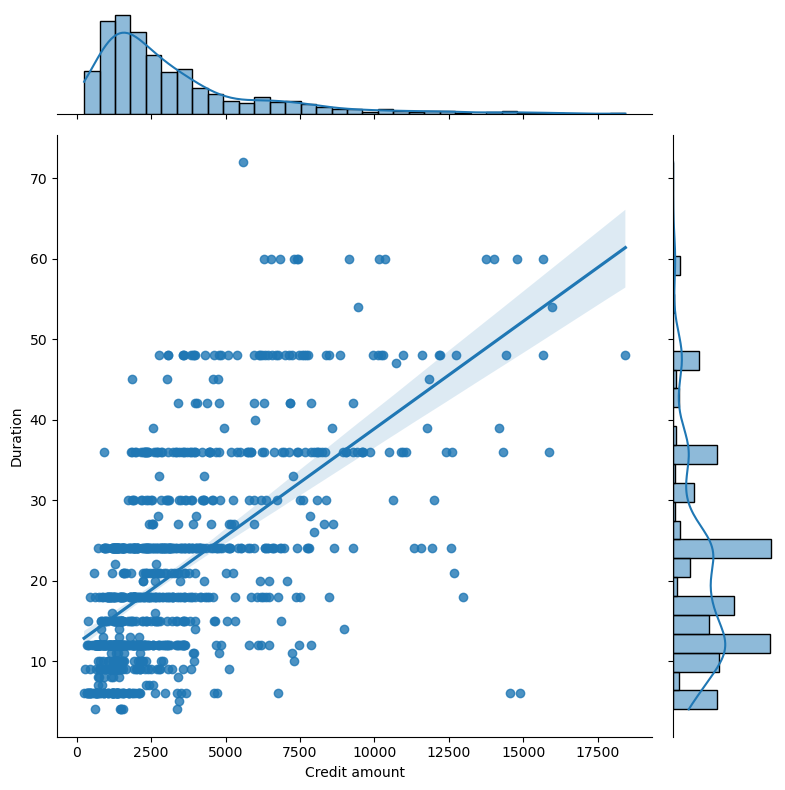

In [28]:
# check the correlation between credit amount and duration

corr_coef, p_value = stats.pearsonr(data["Credit amount"], data["Duration"])
print('Correlation Coefficient = {}'.format(corr_coef))
print('P Value = {}'.format(p_value))

r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="reg", height=8)
plt.show()

In [ ]:
# the statistics record a positive correlation between Credit amount and Duration with a very small p_value
# -> the correlation is justifiable

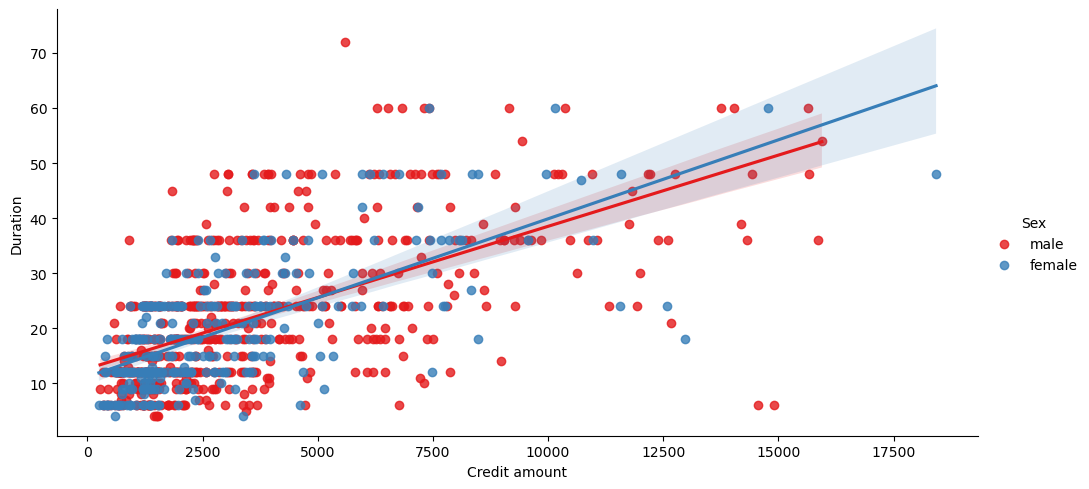

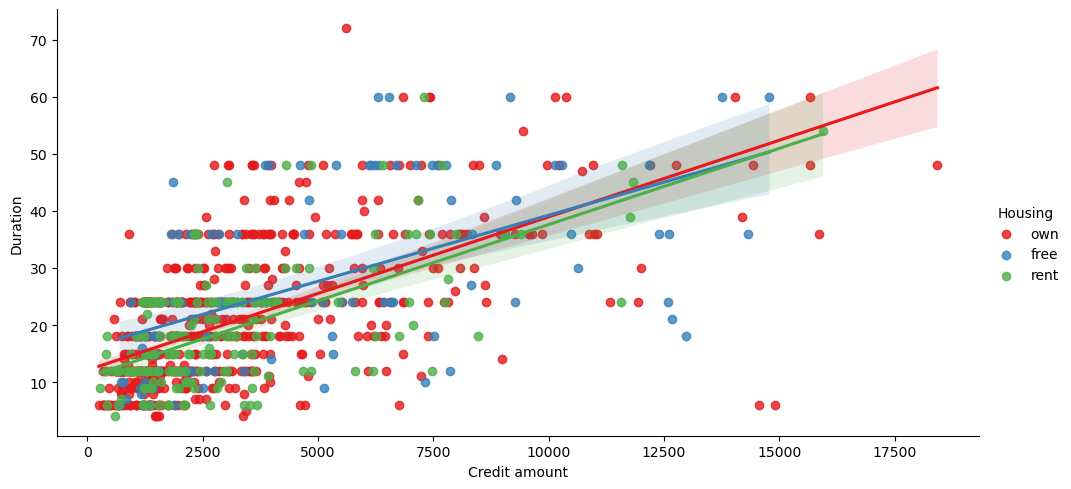

In [12]:
# check for Housing & Gender
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=data, palette="Set1", aspect=2)
plt.show()

In [ ]:
# no clear diff between housing and gender -> not a determine factor for segmentation

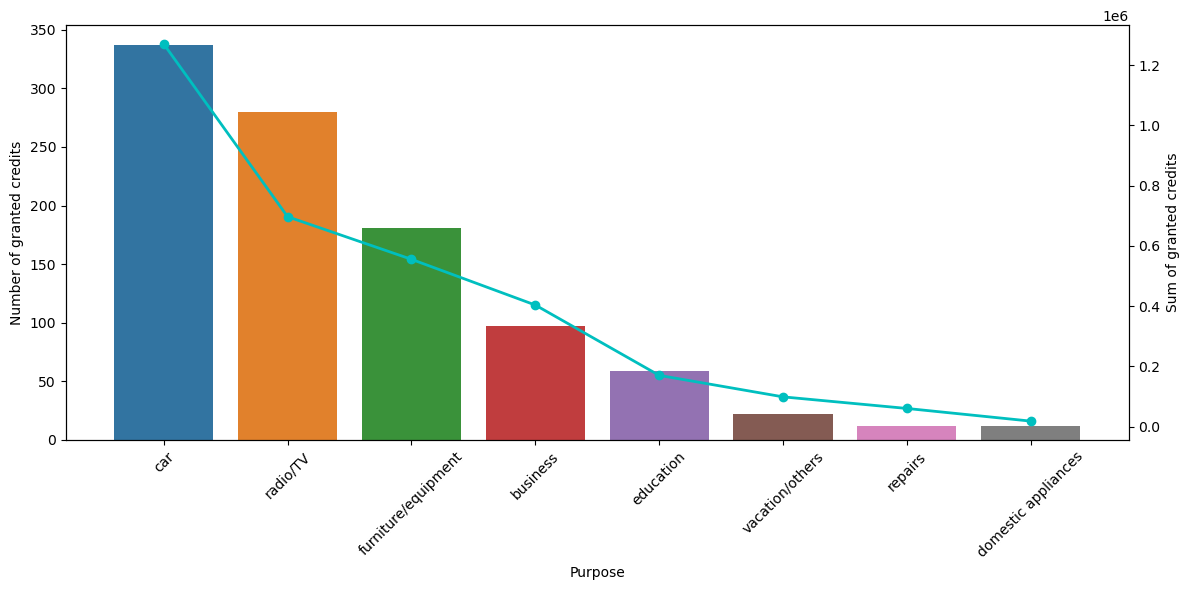

In [38]:
# Check for purpose
# Group by count credit amount
n_credits_count = data.groupby("Purpose")["Credit amount"].count().rename("Count").reset_index()
n_credits_count.sort_values(by=["Count"], ascending=False, inplace=True)

# Group by sum credit amount
n_credits_sum = data.groupby("Purpose")["Credit amount"].sum().rename("Sum").reset_index()
n_credits_sum.sort_values(by=["Sum"], ascending=False, inplace=True)

# Create graph
fig, ax = plt.subplots(figsize=(12, 6))

bar = sns.barplot(x="Purpose", y="Count", data=n_credits_count, ax=ax)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)
ax.set_ylabel("Number of granted credits")

ax2 = ax.twinx()

line = ax2.plot(n_credits_sum["Purpose"], n_credits_sum["Sum"], marker='o', color='c', linewidth=2)
ax2.set_xticklabels(n_credits_sum["Purpose"], rotation=45)
ax2.set_ylabel("Sum of granted credits")

plt.tight_layout()
plt.show()

In [ ]:
# from various purposes, the largest amount of credit were for car and radio/TV
# deep dive into category 

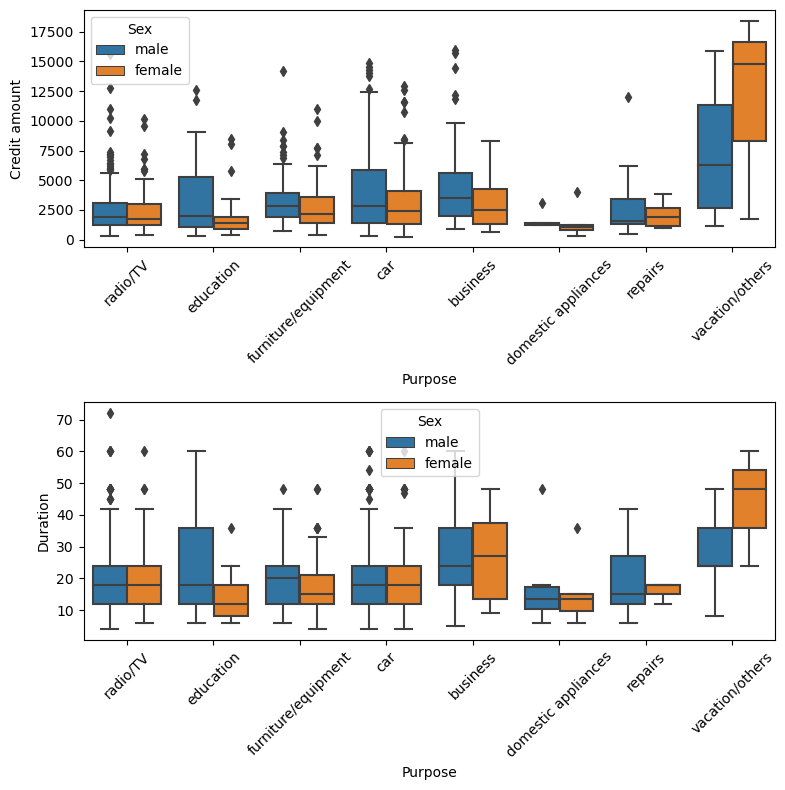

In [82]:
# check purpose by credit amount and duration
def boxes(data, x):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
    box1 = sns.boxplot(x=x,y='Credit amount', hue='Sex', data=data, ax=ax1)
    box1.set_xticklabels(box1.get_xticklabels(), rotation=45)
    box2 = sns.boxplot(x=x,y='Duration', hue='Sex', data=data, ax=ax2)
    box2.set_xticklabels(box2.get_xticklabels(), rotation=45)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
boxes(data, 'Purpose')

In [ ]:
# men tend to take larger credit amount and duration for education purpose while vacation/others is the case for women

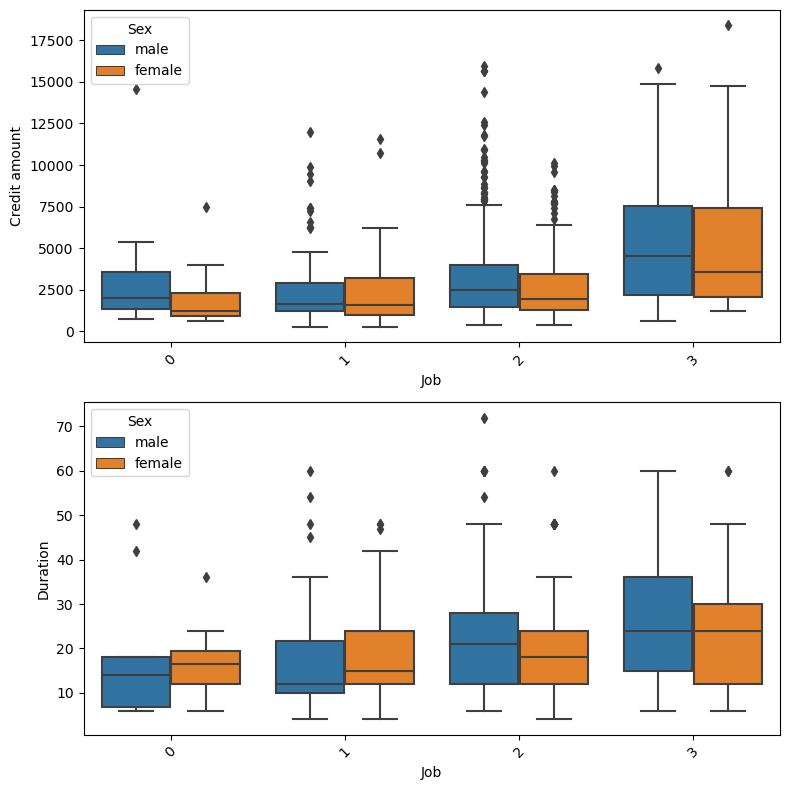

In [83]:
# check for job
boxes(data, 'Job')

In [ ]:
# no clear different between gender
# people with high-paying job will likely to have larger credit amount and longer duration 

In [ ]:
### after exploring the dataset, the clearest variables to use for dividing customer segmentation are Age, Credit amount, Duration
### we will cluster these 3 numeric variables to pick segmentations of customer

In [91]:
# create a subset containing only numerical variable (Age, Credit amount, Duration)
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

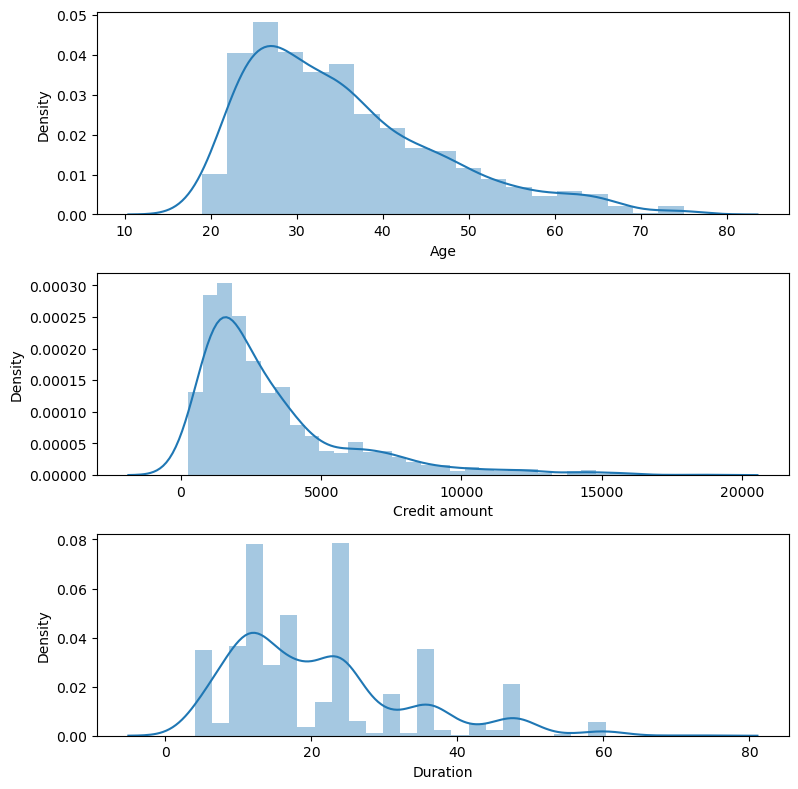

In [94]:
# check for distributions of 3 variables - create histograms
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()
distributions(cluster_data)

In [ ]:
# distributions are positively skewed data (right-skewed), highly skewed data can lead to biased analyses and inaccurate interpretations
# if we want better result, we will need to remove skewness by logarithmic transformation

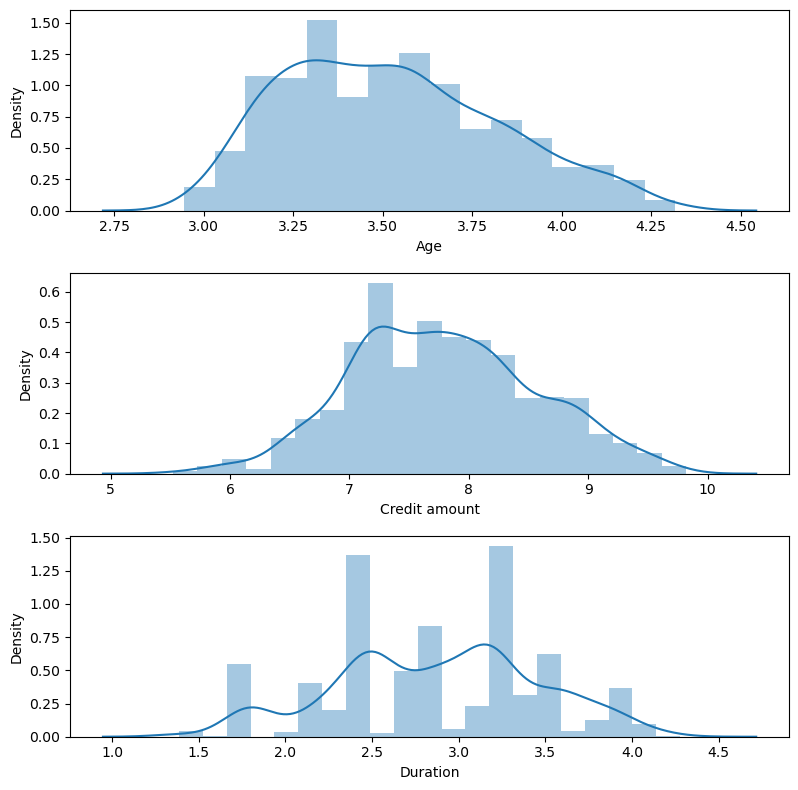

In [95]:
# transform the data by logarithm to achieve a more systematic distribution
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [ ]:
# the skewness has been removed

In [98]:
# centering and scaling of variables using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

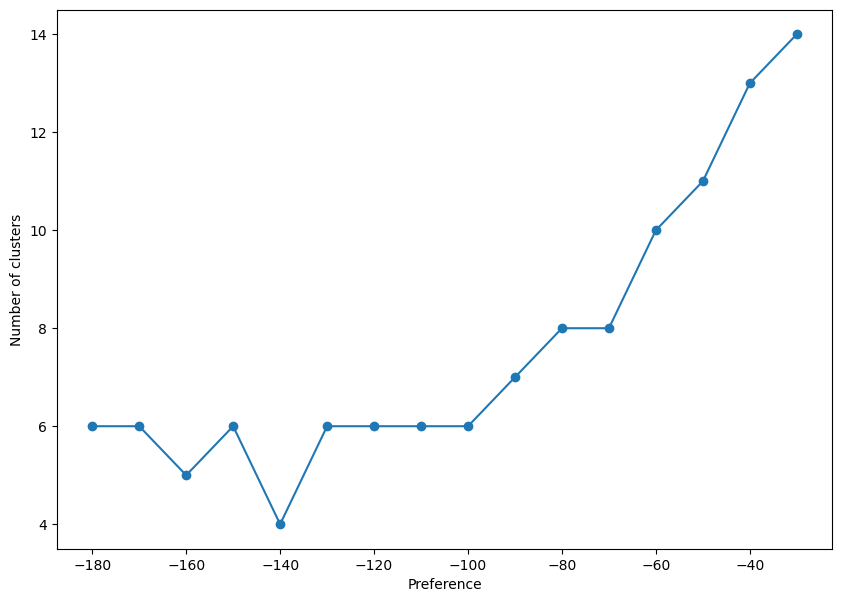

In [101]:
# clustering with affinity propagation
# we don't choose a definite number of clusters, the algorithm itself will define the number
from sklearn.cluster import AffinityPropagation

preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')
plt.show()

In [ ]:
# Together with decreasing value of preference parameter number of clusters goes down as well and levels for very small preference values.

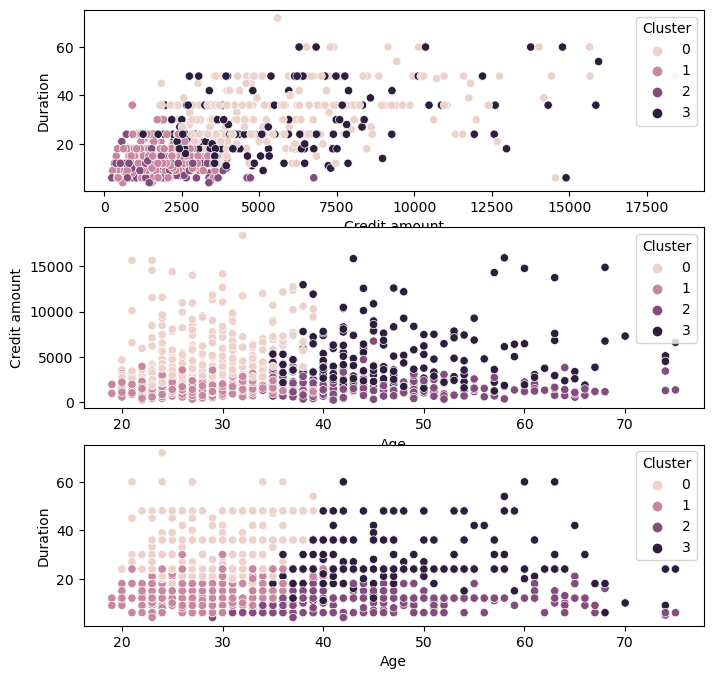

In [104]:
# check for clusters 
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af, h='Cluster')


In [105]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


In [ ]:
# Segmentation 1 – high mean of credit amount, long duration, younger customers
# Segmentation 2 – low mean of credit amount, short duration, younger customers
# Segmentation 3 - low mean of credit amount, short duration, older customers
# Segmentation 4 - high mean of credit amount, middle-time duration, older customers